In [1]:
import numpy as np
import torch
from livelossplot import PlotLosses
from torchsummary import summary
import torch 
import torch.nn as nn

# import custom packages
from WildfirePredict.Task2.models.VAEmodel import VAE
from WildfirePredict.Task2.utils import train
from WildfirePredict.Task2.utils import predict

In [2]:
if torch.cuda.is_available(): 
 dev = "cuda" 
else: 
 dev = "cpu" 
device = torch.device(dev) 

#### Load training and test data

In [3]:
data_path =  'data/Ferguson_fire_train.npy'
train_data = np.load(data_path)
test_path =  'data/Ferguson_fire_test.npy'
test_data = np.load(test_path)

## 1. Training

#### Create data loaders

In [4]:
split_size = 5
batch_size = 16
seq_length = 100

train_loader, train_shifted_loader, test_loader, test_shifted_loader = train.create_dataloaders(train_data, test_data, seq_length, split_size, batch_size)

# Check dataset shapes and lengths
print(f'Train dataset shape: {train_loader.dataset.shape}')
print(f'Test dataset shape: {test_loader.dataset.shape}')

del train_data, test_data

Train dataset shape: torch.Size([125, 19, 256, 256])
Test dataset shape: torch.Size([50, 19, 256, 256])


#### Define model

In [9]:
torch.cuda.empty_cache()
channel_size = 100//split_size -1
latent_dim = 64

model = VAE(latent_dim = latent_dim, 
                channel_size = channel_size
                ).to(device)

input_shape = (batch_size, seq_length, channel_size)
summary(model, input_shape)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x30400 and 1245184x256)

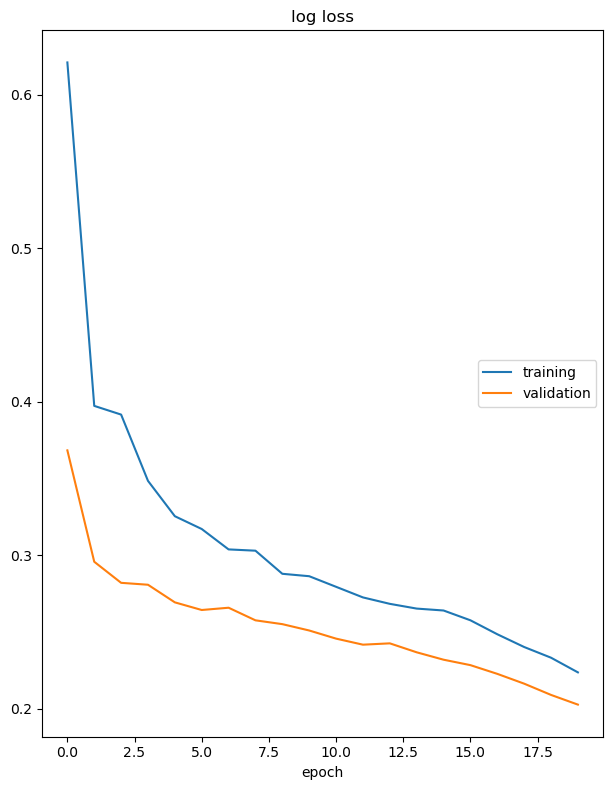

log loss
	training         	 (min:    0.224, max:    0.621, cur:    0.224)
	validation       	 (min:    0.203, max:    0.368, cur:    0.203)


In [6]:
num_epochs = 20
liveloss = PlotLosses()

train_losses = []
val_losses = []
for epoch in range(num_epochs):
    logs = {}
    train_loss = utils.train.train(model, train_loader, train_shifted_loader)
    logs['' + 'log loss'] = train_loss.detach().numpy()

    val_loss = utils.train.validate(model, test_loader, test_shifted_loader)
    logs['val_' + 'log loss'] = val_loss.detach().numpy()

    liveloss.update(logs)
    liveloss.draw()

torch.save(model, "model.pth")

## 2. Prediction

### Extract random sample from latent space

In [39]:
trained_model = model
trained_model = torch.load('model_trained.pth')
predicted_samples = utils.predict.predict_samples(model, 2, latent_dim)
print(predicted_samples[0].shape)
print(predicted_samples[1].shape)


AttributeError: Can't get attribute 'VAE' on <module '__main__'>

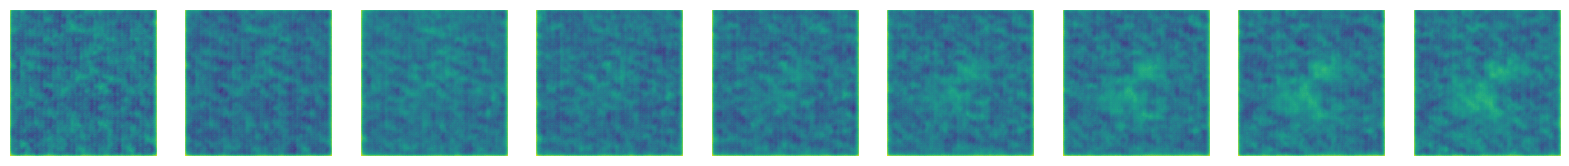

In [30]:
utils.predict.display_samples(predicted_samples, channel_size)